# Example of chemical analysis, analogous to chemanalysis.pro

In [1]:
%%bash
wget https://raw.githubusercontent.com/saint-germain/prodimopy_test/master/notebooks/Reactions.out
wget https://github.com/saint-germain/prodimopy_test/raw/master/notebooks/chemanalysis.out.zip
wget https://github.com/saint-germain/prodimopy_test/raw/master/notebooks/test_TT_model.zip
unzip chemanalysis.out.zip
unzip test_TT_model.zip

Archive:  chemanalysis.out.zip
  inflating: chemanalysis.out        
Archive:  test_TT_model.zip
  inflating: dust_opac.out           
  inflating: StarSpectrum.out        
  inflating: Species.out             
  inflating: Elements.out            
  inflating: line_flux.out           
  inflating: FlineEstimates.out      
  inflating: ProDiMo.out             
  inflating: SED.out                 
  inflating: SEDana.out              


--2019-07-26 19:40:39--  https://raw.githubusercontent.com/saint-germain/prodimopy_test/master/notebooks/Reactions.out
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 363347 (355K) [text/plain]
Saving to: ‘Reactions.out’

     0K .......... .......... .......... .......... .......... 14% 2.34M 0s
    50K .......... .......... .......... .......... .......... 28% 4.72M 0s
   100K .......... .......... .......... .......... .......... 42%  142M 0s
   150K .......... .......... .......... .......... .......... 56% 4.85M 0s
   200K .......... .......... .......... .......... .......... 70%  138M 0s
   250K .......... .......... .......... .......... .......... 84%  219M 0s
   300K .......... .......... .......... .......... .......... 98%  221M 0s
   350K ....       

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import prodimopy.read as pread
import prodimopy.plot as pplot

In [4]:
model=pread.read_prodimo()

READ: Reading File:  ./ProDiMo.out  ...
READ: Reading File:  ./FlineEstimates.out  ...
READ: Reading File:  ./Elements.out  ...
READ: Reading File:  ./dust_opac.out  ...
READ: Reading File:  ./StarSpectrum.out  ...
READ: Reading File:  ./line_flux.out  ...
READ: Reading File:  ./SED.out  ...
READ: Reading File:  ./SEDana.out  ...
READ: Reading File:  ./Species.out  ...
WARN: Could not open ./LINEobs.dat!
WARN: Could not open ./image.out!
INFO: Reading time:  0.44 s
INFO: Calculate column densities
INFO: Calculate surface densities
INFO: Calculate volumes
INFO: Calc time:  0.07 s
 


In [5]:
pp=pplot.Plot(None)

In [6]:
chemistry=pread.analyse_chemistry('CO',model)

READ: Reading File:  ./Reactions.out  ...
READ: Reading File:  ./chemanalysis.out  ...
Writing results to: chemistry_reactions_CO.txt
INFO: Calc time:  8.07 s


In [26]:
with open('chemistry_reactions_CO.txt') as f:
    for line in f:
        print(line.strip())

-------------------------------------------------------
Formation and destruction reactions in descending order
according to their maximum rate across all grid points
species :CO

Formation reactions
1 1817  5211 NN T: C      + OH              --> CO     + H
2 2057  5617 NN T: O      + CN              --> CO     + N
3 1935  5393 NN T: H      + CO2             --> CO     + OH
4 1811  5205 NN T: C      + NO              --> CO     + N
5 1942  5402 NN T: H      + HCO             --> CO     + H2
6  241   489 CE T: H      + CO+             --> CO     + H+
7 2594 10284 DT F: CO#    + dust            --> CO     + dust
8  646  1357 DR T: HCO+   + e-              --> CO     + H
9 1960  5426 NN T: H      + OCN             --> NH     + CO
10 2067  5634 NN T: O      + HCN             --> CO     + NH
11 1174  2777 IN T: H2O    + HCO+            --> CO     + H3O+
12  683  1433 DR T: OCN+   + e-              --> CO     + N
13 2177  5913 PH F: CO2    + PHOTON          --> CO     + O
14 1891  5327 NN T

PLOT: plot_cont ...


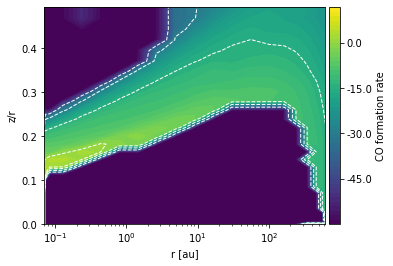

In [7]:
pp.plot_cont(model,chemistry.farray,'CO formation rate');

PLOT: plot_reac ...


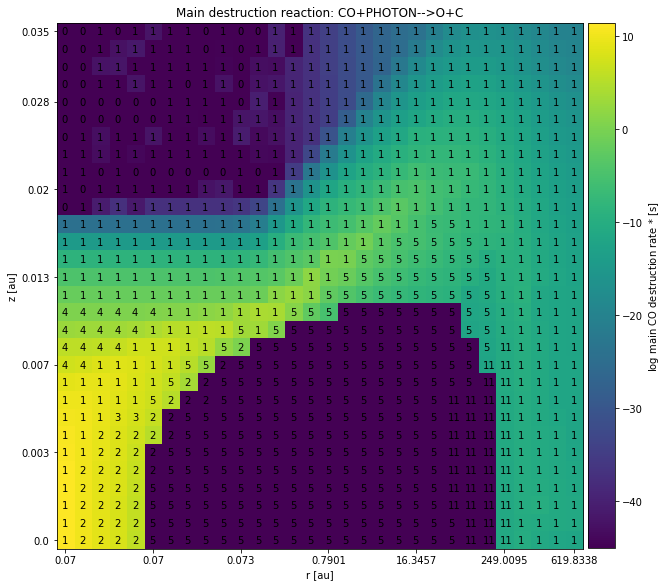

In [19]:
pp.plot_reac(model,chemistry,rtype='d',vmin=-45);

PLOT: plot_reac ...


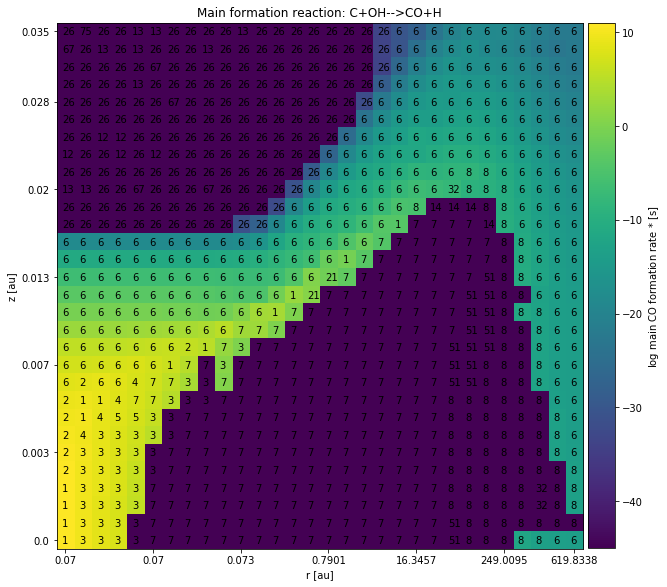

In [20]:
pp.plot_reac(model,chemistry,rtype='f',vmin=-45);

PLOT: plot_reac ...
      Detailed reaction rates for:         CO
------------------------------------------------------------------------------------------------------
                    grid point = 0       29
                      r,z [au] = 0.070  0.0346
                  n<H> [cm^-3] = 6.4e+04   
                Tgas,Tdust [K] = 2.6e+04  1.2e+03
                 AV_rad,AV_ver = 1.0e-99  1.0e-99
                  CO abundance = 1.000000e-64
------------------------------------------------------------------------------------------------------
 Total form. rate [cm^-3 s^-1] = 8.58e-44
   26 2265  6093 RA T: C      + O               --> CO     + PHOTON                    3.64e-44
   67 2187  5928 PH F: H2CO   + PHOTON          --> CO     + H      + H                1.33e-44
   66 2186  5927 PH F: H2CO   + PHOTON          --> CO     + H2                        1.33e-44
   75  605  1241 DR T: CO2+   + e-              --> CO     + O                         9.98e-45
   49  610  1258 DR T

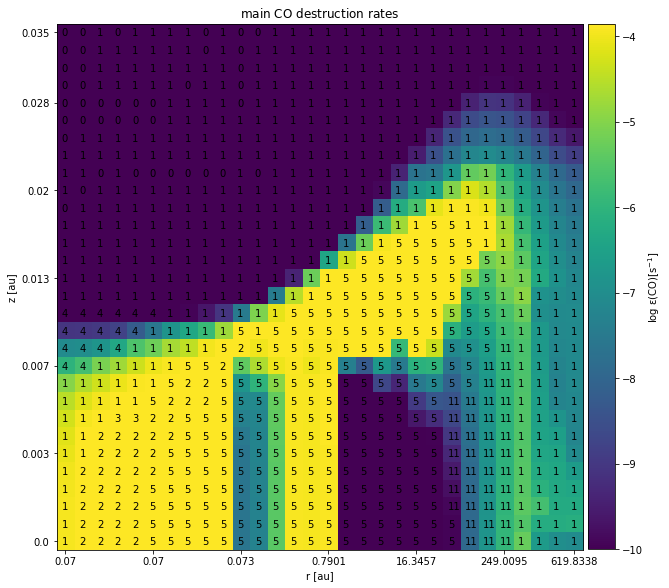

In [31]:
pp.plot_reac(model,chemistry,rtype='d',with_abun=True,vmin=-10)
# 0 means that the destruction rate at that point was so low it didn't get 
# registered in chemanalysis.out (in ProDiMo):
pread.reac_rates_ix_iz(model,chemistry,0,29)

PLOT: plot_reac ...


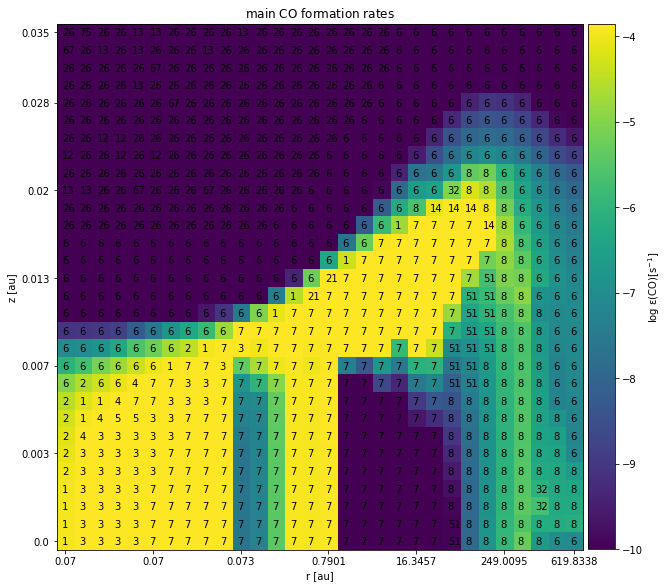

In [16]:
pp.plot_reac(model,chemistry,rtype='f',with_abun=True,vmin=-10);

In [17]:
chemistry.sorted_dest_info

['    1 2178  5914 PH F: CO     + PHOTON          --> O      + C                         ',
 '    2 2107  5692 NN T: OH     + CO              --> CO2    + H                         ',
 '    3 2313  6202 CL T: H      + CO     + M      --> HCO    + M                         ',
 '    4 1392  3441 IN T: He+    + CO              --> O      + C+     + He               ',
 '    5 2593 10283 IC F: CO     + dust            --> CO#    + dust                      ',
 '    6 1707  4007 IN T: OH+    + CO              --> HCO+   + O                         ',
 '    7 1520  3716 IN T: NH+    + CO              --> OCN+   + H                         ',
 '    8 1148  2737 IN T: H2O+   + CO              --> HCO+   + OH                        ',
 '    9 1519  3715 IN T: NH+    + CO              --> HCO+   + N                         ',
 '   10  294   550 CE T: N+     + CO              --> CO+    + N                         ',
 '   11 1213  2905 IN T: H3+    + CO              --> HCO+   + H2               

In [18]:
chemistry.sorted_form_info

['    1 1817  5211 NN T: C      + OH              --> CO     + H                         ',
 '    2 2057  5617 NN T: O      + CN              --> CO     + N                         ',
 '    3 1935  5393 NN T: H      + CO2             --> CO     + OH                        ',
 '    4 1811  5205 NN T: C      + NO              --> CO     + N                         ',
 '    5 1942  5402 NN T: H      + HCO             --> CO     + H2                        ',
 '    6  241   489 CE T: H      + CO+             --> CO     + H+                        ',
 '    7 2594 10284 DT F: CO#    + dust            --> CO     + dust                      ',
 '    8  646  1357 DR T: HCO+   + e-              --> CO     + H                         ',
 '    9 1960  5426 NN T: H      + OCN             --> NH     + CO                        ',
 '   10 2067  5634 NN T: O      + HCN             --> CO     + NH                        ',
 '   11 1174  2777 IN T: H2O    + HCO+            --> CO     + H3O+             

In [28]:
pread.reac_rates_ix_iz(model,chemistry,10,10)

      Detailed reaction rates for:         CO
------------------------------------------------------------------------------------------------------
                    grid point = 10       10
                      r,z [au] = 0.073  0.0069
                  n<H> [cm^-3] = 1.2e+14   
                Tgas,Tdust [K] = 1.1e+03  1.1e+03
                 AV_rad,AV_ver = 9.0e+01  1.8e+01
                  CO abundance = 4.375163e-06
------------------------------------------------------------------------------------------------------
 Total form. rate [cm^-3 s^-1] = 4.12e+04
    7 2594 10284 DT F: CO#    + dust            --> CO     + dust                      4.12e+04
   11 1174  2777 IN T: H2O    + HCO+            --> CO     + H3O+                      1.01e-01
   19 2201  5958 PH F: HCO    + PHOTON          --> CO     + H                         4.21e-02
   22 1602  3814 IN T: NH3    + HCO+            --> CO     + NH4+                      2.30e-02
    5 1942  5402 NN T: H      + HCO     